# Regression Analysis

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission 

**1** Import needed libraries

**2** read data from file

**3** list dataset showing first 5 lines. View data types

**4** verify possible values of categoric variable Ft

**5** convert Petrol to PETROL and Diesel to DIESEL

**6** verify again values of categoric variable Ft

**7** convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

**8** remove all lines with NaN from df dataset and set to XY

**9** create a Y vector and X matrix

**10** create a regression model

**11** analyse correlation between variables. Use seaborn. Like for example in:

    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

**12** convert Ft into dummy variables

**13** add dummy variable to a new data set XY2

**14** create a Y vector and X matrix

**15** create a regression model

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [15]:
df=pd.read_csv("CO2_passenger_cars2018b.csv")
df.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375,104.0,DIESEL,1598,85.0
1,VOLKSWAGEN,GOLF,1340,119.0,PETROL,1498,110.0
2,VOLKSWAGEN,GOLF,1320,120.0,PETROL,1498,110.0
3,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
4,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0


In [16]:
df.dtypes

Fabricante         object
CommercialName     object
m (kg)             object
Enedc (g/km)      float64
Ft                 object
ec (cm3)           object
ep (KW)           float64
dtype: object

In [17]:
df['Ft'].unique()
df["Ft"]=df["Ft"].replace("Petrol","PETROL")
df["Ft"]=df["Ft"].replace("Diesel","DIESEL")
df['Ft'].unique()

array(['DIESEL', 'PETROL', nan], dtype=object)

In [18]:
df.iloc[:,2]=pd.to_numeric(df.iloc[:,2],errors='coerce')
df.iloc[:,5]=pd.to_numeric(df.iloc[:,5],errors='coerce')
df.dtypes

Fabricante         object
CommercialName     object
m (kg)            float64
Enedc (g/km)      float64
Ft                 object
ec (cm3)          float64
ep (KW)           float64
dtype: object

In [19]:
XY=df.dropna()
XY.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,DIESEL,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,PETROL,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,PETROL,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,PETROL,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,PETROL,999.0,70.0


In [20]:
Y=XY['Enedc (g/km)']
X=XY[['m (kg)','ec (cm3)','ep (KW)']]

In [26]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.coef_

array([ 0.02414271, -0.00170046,  0.31175694])

In [28]:
lm.score(X,Y)

0.49445909800069104

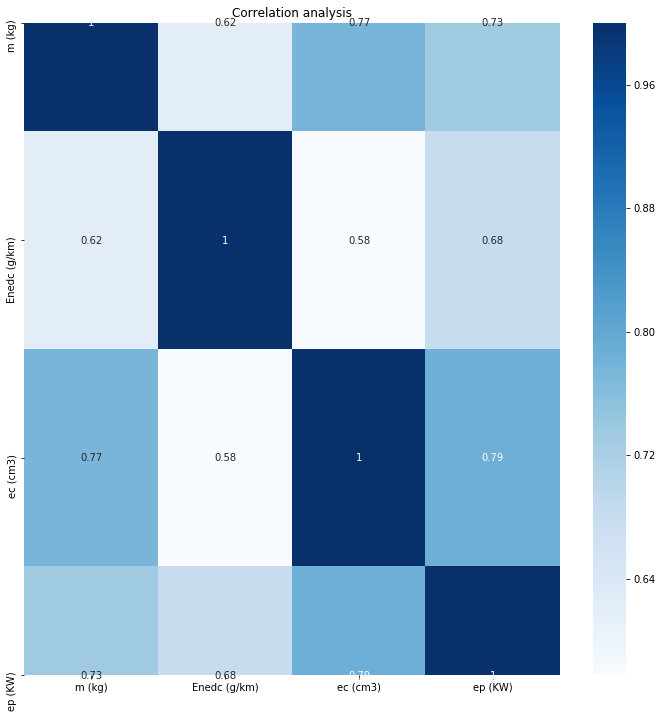

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [30]:
df2=df
df2["Ft"]=df2["Ft"].replace("PETROL",0)
df2["Ft"]=df2["Ft"].replace("DIESEL",1)
XY2=df2.dropna()
XY2.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,1.0,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,0.0,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,0.0,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0


In [31]:
Y2=XY2['Enedc (g/km)']
X2=XY2[['m (kg)','ec (cm3)','ep (KW)','Ft']]

In [32]:
lm2=LinearRegression()
lm2.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm2.coef_

array([ 5.40879228e-02,  1.72812603e-02,  4.57921958e-02, -2.66822078e+01])

In [35]:
lm2.score(X2,Y2)

0.674022337178782

In [36]:
lm2.intercept_

29.70545686319852